In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv("../../matching.csv")
fd = pd.read_csv("/Users/jan/ai4good/data/reforestree/field_data.csv")

In [3]:
matches.set_index("Unnamed: 0", inplace=True)

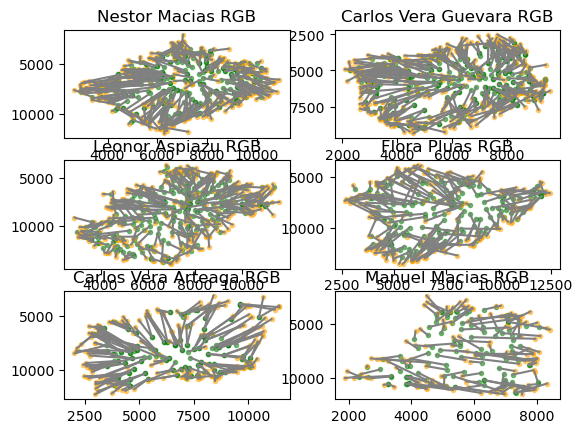

In [4]:
fig, ax = plt.subplots(3, 2)

for t, site in enumerate(fd.site.unique()):
    bboxes = matches.loc[matches.site == site, ["Ycenter", "Xcenter"]].values
    matches_site = matches.loc[matches.site == site, "matches"]
    is_match = fd.index.isin(matches_site) 
    dp_matched = fd.loc[is_match, ["Y", "X"]].values
    dp_unmatched = fd.loc[~is_match & (fd.site == site), ["Y", "X"]].values

    i = t % 3
    j = (1 if t >= 3 else 0)

    ax[i, j].scatter(bboxes[:, 0], bboxes[:, 1], marker=".", alpha=0.5, color="g")
    ax[i, j].scatter(dp_matched[:, 0], dp_matched[:, 1], marker=".", alpha=0.5, color="orange")
    #ax[i, j].scatter(dp_unmatched[:, 0], dp_unmatched[:, 1], alpha=0.5, marker=".", color="yellow")
    for k, match in enumerate(matches_site):
        x = bboxes[k, :]
        y = fd.loc[match, ["Y", "X"]].values
        ax[i, j].plot([x[0], y[0]], [x[1], y[1]], alpha=1, color="grey")
    ax[i, j].set_title(site)
    ax[i, j].invert_yaxis()
    


In [40]:
import rasterio

In [41]:
with rasterio.open(f"/Users/jan/ai4good/data/reforestree/wwf_ecuador/RGB Orthomosaics/{site}.tif") as rs:
    img = rs.read()

In [44]:
img.shape

(4, 10879, 13748)

In [46]:
matches[matches.site == site].describe()

,Xcenter,Ycenter,matches
count,178.000000,178.000000,178.000000
mean,7506.354082,5513.983992,4355.724719
std,2507.576471,1584.256689,124.168455
min,2443.610840,2021.038513,4180.000000
25%,5261.413483,4203.827919,4242.750000
50%,7727.561086,5403.613770,4342.500000
75%,9876.818341,6986.140221,4444.500000
max,11367.057495,8184.262817,4645.000000


In [47]:
final_data = pd.read_csv("/Users/jan/ai4good/data/reforestree/mapping/final_dataset.csv")

In [50]:
final_data[final_data.img_name == site].describe()

,xmin,ymin,xmax,ymax,score,tile_index,tile_xmin,tile_ymin,tile_xmax,tile_ymax,...,year,tree_id,is_musacea_g,X_g,Y_g,updated diameter,updated height,AGB,carbon,id
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,...,484.0,484.0,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,1695.418433,1833.706679,2028.639512,2179.999895,0.390038,5.516529,5359.016529,3666.820248,9359.016529,7666.820248,...,2019.0,0.0,0.225207,7755.306662,5862.039017,6.445804,5.559298,5.813982,2.267453,157.047521
std,1163.400526,1057.048631,1165.348502,1056.164115,0.137349,3.304075,3376.707979,2887.704536,3376.707979,2887.704536,...,0.0,0.0,0.418151,2191.360604,1397.083203,7.005944,23.667004,10.047822,3.918650,111.421178
min,0.000000,0.000000,111.162582,137.272705,0.200119,0.000000,0.000000,0.000000,4000.000000,4000.000000,...,2019.0,0.0,0.000000,2368.506330,1884.593530,1.800628,0.000000,0.191457,0.074668,0.000000
25%,682.915268,1030.163422,1038.252777,1398.056732,0.275873,3.000000,3800.000000,0.000000,7800.000000,4000.000000,...,2019.0,0.0,0.000000,5931.519164,4944.983226,2.387319,0.000000,0.676596,0.263872,60.000000
50%,1618.698425,1799.670227,1944.835999,2124.754150,0.362932,5.000000,3800.000000,3800.000000,7800.000000,7800.000000,...,2019.0,0.0,0.000000,8229.950109,5970.721868,2.387319,0.000000,0.676596,0.263872,132.500000
75%,2671.811096,2677.429138,3025.262817,3003.371277,0.492805,8.000000,7600.000000,6879.000000,11600.000000,10879.000000,...,2019.0,0.0,0.000000,9532.770868,6966.829413,6.843647,0.000000,8.250212,3.217583,253.250000
max,3892.095215,3878.259277,3999.797852,3999.855713,0.790393,11.000000,9748.000000,6879.000000,13748.000000,10879.000000,...,2019.0,0.0,1.000000,11524.940963,8415.710709,27.692895,140.000000,82.949230,32.350200,374.000000


In [51]:
fd[fd.site == site].describe()

,lat,lon,diameter,height,year,X,Y,updated diameter,AGB,carbon
count,484.000000,484.000000,484.000000,484.000000,484.0,484.000000,484.000000,484.000000,484.000000,484.000000
mean,-1.129540,-79.594181,5.505674,5.559298,2019.0,7755.306662,5862.039017,6.445804,5.813982,2.267453
std,0.000132,0.000219,12.668592,23.667004,0.0,2191.360604,1397.083203,7.005944,10.047822,3.918650
min,-1.129782,-79.594719,0.000000,0.000000,2019.0,2368.506330,1884.593530,1.800628,0.191457,0.074668
25%,-1.129645,-79.594363,0.000000,0.000000,2019.0,5931.519164,4944.983226,2.387319,0.676596,0.263872
50%,-1.129551,-79.594133,0.000000,0.000000,2019.0,8229.950109,5970.721868,2.387319,0.676596,0.263872
75%,-1.129454,-79.594003,6.603409,0.000000,2019.0,9532.770868,6966.829413,6.843647,8.250212,3.217583
max,-1.129165,-79.593804,211.038961,140.000000,2019.0,11524.940963,8415.710709,27.692895,82.949230,32.350200
